In [3]:
import qiskit

In [4]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.12.0',
 'qiskit-aer': '0.4.0',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.5.0',
 'qiskit-aqua': '0.6.4',
 'qiskit': '0.16.0'}

In [5]:
from qiskit import IBMQ

In [6]:
IBMQ.save_account('4eb9b7f945020d8a9856c0f0e74c53ba48cbe0f3740dda1c0cb5a15240cf82330940fdef3a406c118662945b55e2655807948f63dd7ff57343d6fb491cd121b9')

Credentials already present. Set overwrite=True to overwrite.


In [7]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [29]:
from qiskit import *

In [30]:
qr = QuantumRegister(2)

In [31]:
cr = ClassicalRegister(2)

In [32]:
circuit = QuantumCircuit(qr, cr)

In [33]:
%matplotlib inline

In [34]:
circuit.draw()

q1_0: |0>
         
q1_1: |0>
         
 c1_0: 0 
         
 c1_1: 0

In [35]:
circuit.h(qr[0])

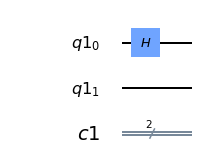

In [36]:
circuit.draw(output='mpl')

In [37]:
circuit.cx(qr[0],qr[1])

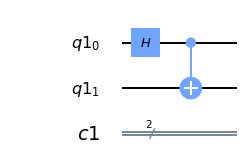

In [38]:
circuit.draw(output='mpl')

In [39]:
circuit.measure(qr, cr)

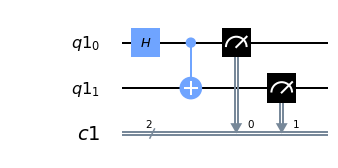

In [40]:
circuit.draw(output='mpl')

In [41]:
simulator = Aer.get_backend('qasm_simulator')

In [42]:
result = execute(circuit,backend = simulator).result()

In [43]:
from qiskit.tools.visualization import plot_histogram

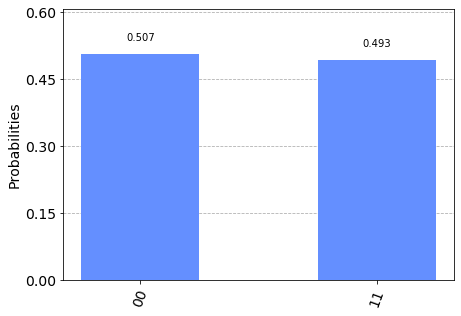

In [44]:
plot_histogram(result.get_counts(circuit))

In [45]:
IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [46]:
provider = IBMQ.get_provider('ibm-q')

In [47]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [48]:
job = execute(circuit, backend=qcomp)

In [49]:
from qiskit.tools.monitor import job_monitor

In [50]:
job_monitor(job)

Job Status: job has successfully run


In [51]:
result = job.result()

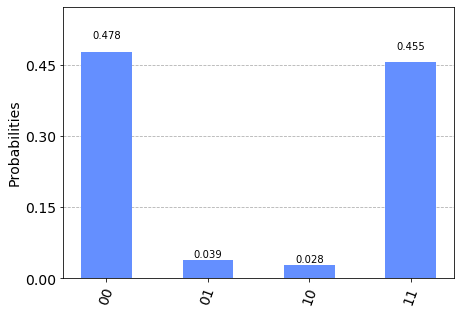

In [52]:
plot_histogram(result.get_counts(circuit))

In [53]:
from qiskit.tools.visualization import plot_bloch_multivector

[0.+0.j 1.+0.j]


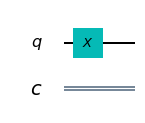

In [31]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()
print(statevector)
%matplotlib inline
circuit.draw(output='mpl')

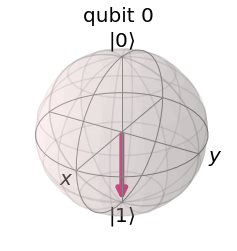

In [32]:
plot_bloch_multivector(statevector)

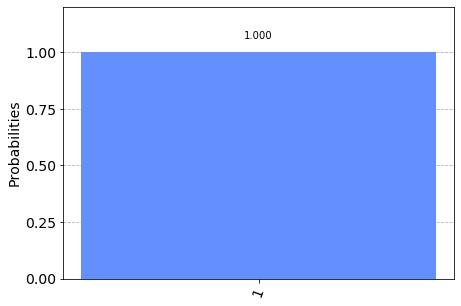

In [33]:
circuit.measure([0],[0])
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = backend, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

In [34]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
simulator = Aer.get_backend('unitary_simulator')
result = execute(circuit, backend = simulator).result()
unitary = result.get_unitary()
print(unitary)


[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


In [35]:
circuit = QuantumCircuit(3, 3)

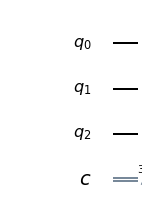

In [36]:
%matplotlib inline
circuit.draw(output = 'mpl')

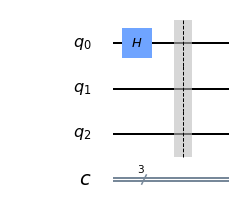

In [37]:
circuit.h(0)
circuit.barrier()
circuit.draw(output='mpl')

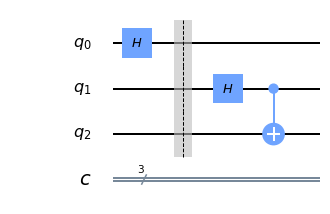

In [38]:
circuit.h(1)
circuit.cx(1,2)
circuit.draw(output='mpl')

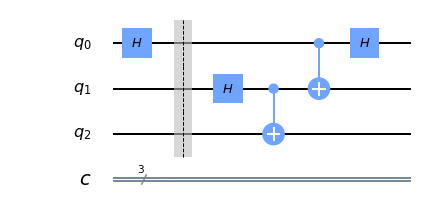

In [39]:
circuit.cx(0,1)
circuit.h(0)
circuit.draw(output='mpl')

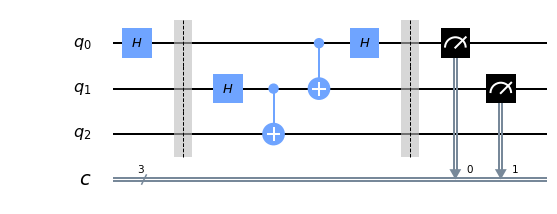

In [40]:
circuit.barrier()
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

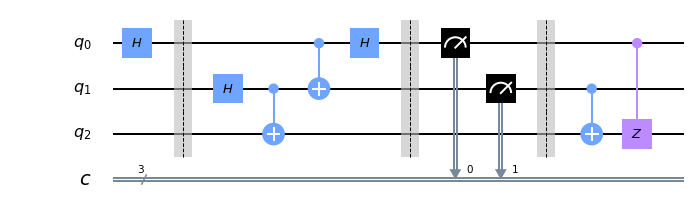

In [41]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output='mpl')

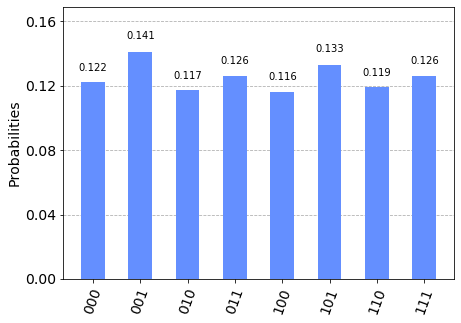

In [42]:
circuit.measure(2,2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [43]:
print(counts)

{'101': 136, '110': 122, '100': 119, '010': 120, '111': 129, '001': 144, '011': 129, '000': 125}


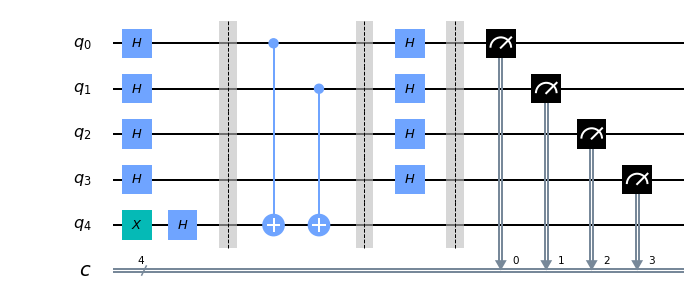

In [44]:
secretnumber = '0011'
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))
#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))
circuit.barrier()

for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii,len(secretnumber))
#circuit.cx(5,6)
#circuit.cx(3,6)
#circuit.cx(0,6)
circuit.barrier()
circuit.h(range(len(secretnumber)))
circuit.barrier()
circuit.measure(range(len(secretnumber)),range(len(secretnumber)))
circuit.draw(output='mpl')

In [45]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)


{'0011': 1}


In [46]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(circuit, backend=qcomp)
job_monitor(job)

Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


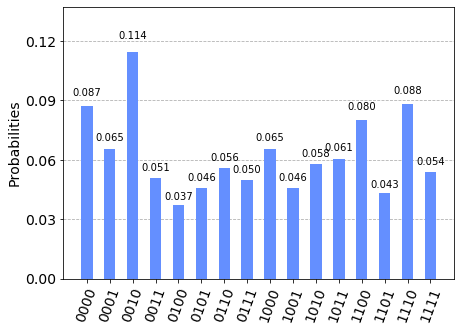

In [47]:
result = job.result()
plot_histogram(result.get_counts(circuit))

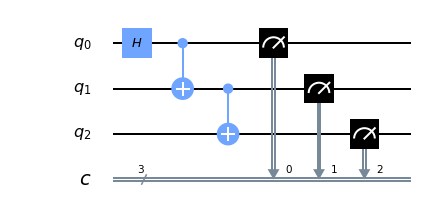

In [67]:
nqubits = 3
circuit = QuantumCircuit(nqubits, nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2], [0,1,2])
circuit.draw(output='mpl')

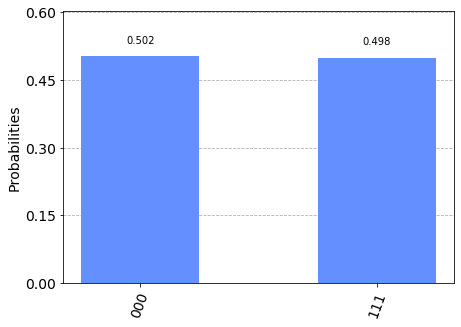

In [68]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend = simulator, shots=1024).result()
plot_histogram(sim_result.get_counts(circuit))

In [69]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibmqx2')
job = execute(circuit, backend = device, shots = 1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Credentials are already in use. The existing account in the session will be replaced.


5e4ef9222d194e001886b609
Job Status: job has successfully run


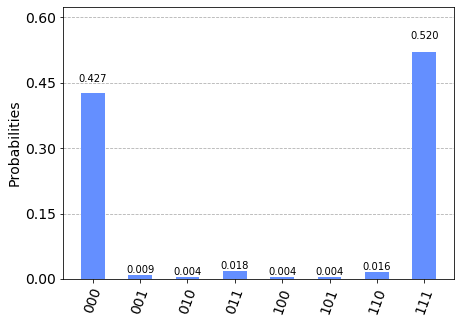

In [70]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

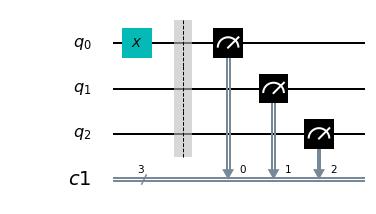

In [71]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)
cal_circuits, state_labels = complete_meas_cal(qr = circuit.qregs[0], circlabel = 'measerrormitigationcal')
cal_circuits[1].draw(output='mpl')

In [72]:
len(cal_circuits)
cal_job = execute(cal_circuits, backend = device, shots = 1024, optimization_level = 0)
print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()

5e4ef9581a7482001850ae6e
Job Status: job has successfully run


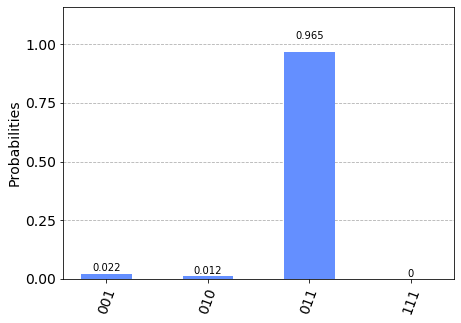

In [73]:
plot_histogram(cal_results.get_counts(cal_circuits[3]))


In [74]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

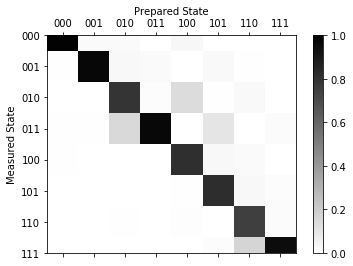

In [75]:
meas_fitter.plot_calibration()

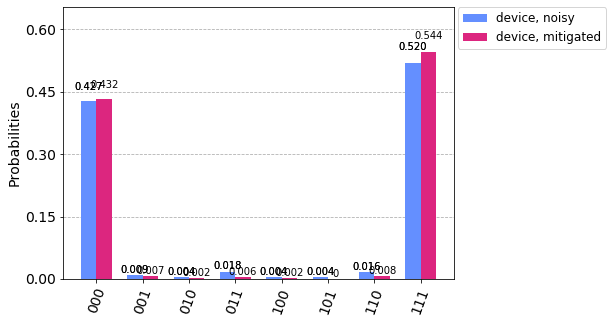

In [76]:
meas_filter = meas_fitter.filter
mitigated_result = meas_filter.apply(device_result)

device_counts = device_result.get_counts(circuit)
mitigated_counts = mitigated_result.get_counts(circuit)
plot_histogram([device_counts, mitigated_counts], 
               legend=['device, noisy', 'device, mitigated'])

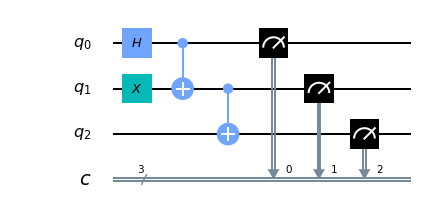

In [77]:
circuit2 = QuantumCircuit(3,3)
circuit2.x(1)
circuit2.h(0)
circuit2.cx(0,1)
circuit2.cx(1,2)
circuit2.measure([0,1,2], [0,1,2])
circuit2.draw(output='mpl')

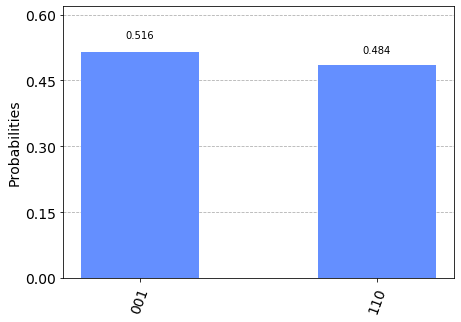

In [78]:

plot_histogram(
    execute(circuit2, backend=simulator, shots=1024).result().get_counts(circuit2)
)

In [79]:
device_counts_2 = execute(circuit2, backend=device, shots=1024).result().get_counts(circuit2)

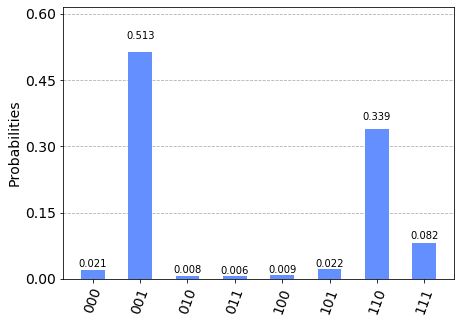

In [80]:
plot_histogram(device_counts_2)

In [81]:
mitigated_counts_2 = meas_filter.apply(device_counts_2)

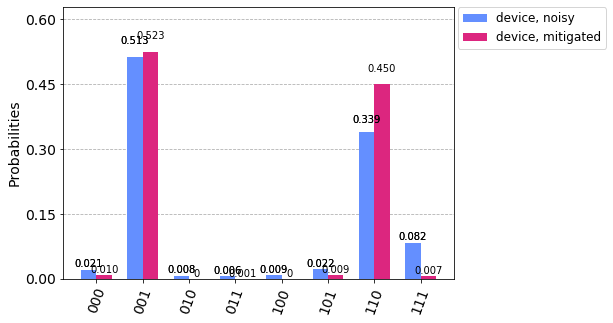

In [82]:
plot_histogram([device_counts_2, mitigated_counts_2], legend=['device, noisy','device, mitigated'])